# Strategies for dealing with big data 
## Process your Python code with speed

## _By Jeff Hale_

Python is the most popular languae for scientific and numerical computing and pandas is the most Python package for doing data science. 

Using pandas with Python allows you to handle much more data than you can with Excel, Sheets, or Numbers. And Python and its data science libraries have many advantages over working with SQL, and cloud variations when it comes to expressiveness and ability to quickly do data analysis, statistics, machine learning (including deep learning). 

Unfortunately, if you are working locally, the amount of data that pandas can handle is limited by the amount of memory on your machine. And if you're working in the cloud, more memory costs more money. Regardless, we want our operations to happen quickly so we can GSD (Get Stuff Done)!

Don't prematurely optimize. If you can, stay in pandas. Don't worry about these issues if you aren't having problems and you don't expect your data to balloon. 

If you want to time things in a Jupyter notebook, you can use %time or %%timeit magic commands. Or in a script or notebook, import time and do time.now before and after and find the difference. Note that different machines and versions can cause variation and caching will sometimes mess with results and wall time and clock time. As with all experimentation, hold everything you can constant and note what you can't hold constant.

## Things to always do
These are just good good coding practices.
1. Avoid nested loops whenever possible. [Here's](https://stackabuse.com/big-o-notation-and-algorithm-analysis-with-python-examples/) a brief primer on Big-O notation and algorithm analysis. One for loop nested inside another for loop generally leads to polynomial time. If you have more than a few items to search through, this begins to take a while. See chart and nice explanation [here](https://skerritt.blog/big-o/).
1. Use list comprehensions (and dict comprehensions) whenever possible. Creating a list on demand is faster than  load the append attribute of the list and repeatedly calling it as a function - hat tip [here](https://stackoverflow.com/a/30245465/4590385). However, in general, don't sacrifice clarity for speed, so be careful with nesting list comprehensions. 
1. In pandas, use built-in vectorized functions. The principle is really the same as the reason for dict comprehensions. Apply a function to a whole data structure at once is much faster than repeatedly calling a function.

If you find yourself reaching for `apply`, think about whether you really need to. It's looping over rows or columns. Vectorized methods are usually faster and less code, so they are a win win. 🚀 

Avoid the other pandas Series and DataFrame methods that loop over your data - `applymap`, `itterrows`, `ittertuples`. Use the `replace` method on a DataFrame instead of any of those other options to save lots of time.

Notice that these rules might not hold for very small amounts of data, but in that cases, the stakes are low, so who cares. 😉

## Things to do with pretty big data (roughly millions of rows):
1. Use a subset of your data to explore, clean, make a baseline model if you're doing machine learning. Solve 90% of your problems fast and save time and resources. This technique can save you so much time!
1. Load only the columns that you need with the [`usecols`](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#load-less-data) argument when reading in your DataFrame. Less data in = win!
1. Use dtypes efficently. Downcast numeric columns to the smallest dtypes that makes sense with pandas.to_numeric(). Convert columns with low cardinality (just a few values) to a categorical dtype. [Here's]( https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#use-efficient-datatypes) a pandas guide on efficient dtypes.
1. Parallelize model training in scikit-learn to use more processing cores whenever possible. By default, scikit-learn uses just one of your machine's cores. Many computers have 4 or more cores. You can use them all for parallelizable tasks by passing the argument `n_jobs=-1` when doing cross validation with GridSearchCV and many other classes.
1. Save pandas DataFrames in feather or pickle formats for faster reading and writing. Hat tip to Martin Skarzynski, who links to evidence and code [here](https://mobile.twitter.com/marskar/status/1296833212568735751).
1. Use [pd.eval](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.eval.html#pandas.eval) to speed up pandas operations. Pass the function your usual code in a string. It does the operation much faster. Here's a chart from tests with 100 column DataFrame.
![img]('') image from this good article on the topic [this article](https://towardsdatascience.com/speed-up-your-numpy-and-pandas-with-numexpr-package-25bd1ab0836b). [df.query](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query) is the same deal, but a DataFrame method instead of a top-level pandas function. 

See the docs because there are some gotchas. ⚠️

Pandas is using [numexpr](https://numexpr.readthedocs.io/projects/NumExpr3/en/latest/intro.html) under the hood. Numexpr also works with NumPy.  Hat tip to Chris Conlan in his book [Fast Python](https://chrisconlan.com/fast-python/). Chris's book is an excellent read for learning how to speed up your Python code.

# Things do with really big data (roughly tens of millions of rows and up)
1. Use [numba](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html#using-numba). Numba gives you a big speed boost if you're doing mathematical calcs. To use it install numba and import it. Then use the `@numba.jit` decorator function when you need to loop over NumPy arrays and can't use vectorized methods. It only works  with only NumPy arrays. Use `.to_numpy()` on a pandas DataFrame to convert it to a NumPy array. 
1. Use sparse arrays when it makes sense. Scikit-learn ouptputs sparse arrays automatically with some transformers, such as CountVectorizer. When your data is mostly 0s or missing values, you can convert columns to sparse dtypes in pandas. Read more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html). 
1. Use [Dask](https://dask.org/) to parallelize the reading of datasets into pandas in chunks. Dask can also parallelize data operations across multiple machines. It mimics a subset of the pandas and NumPy APIs. [Dask-ML](https://ml.dask.org/) is a sister package to parallelize machine learning algorithms across multiple machines. It mimics the scikit-learn API. Dask plays nicely with other popular machine learning libraries such as XGBoost, LightGBM, PyTorch, and TensorFlow. 
1. Use PyTorch with or without a GPU. You can get really big speedups by using PyTorch on a GPU, as I found in [this article on sorting](https://towardsdatascience.com/surprising-sorting-tips-for-data-scientists-9c360776d7e). 

# To keep an eye on/experiment with for dealing with big data in the future

The following are bleeding edge technologies as of mid-2020. Expect configuration issues and early stage APis. If you are working locally on a cpu, these are unlikely to fit your needs.

1. Do you have access to lots of cpu cores? Does your data have more than 32 columns (necessary as of mid-2020)? Consider [Modin](https://modin.readthedocs.io/en/latest/).  It seeks to mimic the pandas library and speed up operations on large datsets. It uses Apache Arrow (via Ray) or Dask under the hood. Dask is experimental. Some things weren't fast in my tests - for example reading in data from NumPy arrays was slow  for me. Memory managment was an issue in my tests. 
1. Can use [jax](https://github.com/google/jax) in place of NumPy. Jax is an opensource google product that's bleading edge. It speeds up operations by using five things under the hood: autograd, XLA, JIT, vectorizer, and parallelizer. And works on a CPU, GPU, or TPU and might be simpler than using PyTorch or TensorFlow to get speed boosts. It's good for deeplearning. It has a NumPy version but no pandas version yet. However, you could convert a DataFrame to TensorFlow and then use Jax, or just convert to NumPy and then use jax. Read more [here](https://iaml.it/blog/jax-intro-english). 
1. [Rapids cuDF](https://github.com/rapidsai/cudf) uses Apache Arrow on GPUs with a pandas-like API. It's an open source Python package from NVIDIA. Rapids plays nicely with Dask so you could get multiple GPUs processing data in parallel. 

# Other considerations:


GitHub's maximum file size is [100MB](https://docs.github.com/en/github/managing-large-files/what-is-my-disk-quota). You can use [Git Large File Storage extension](https://git-lfs.github.com/) if you want to version large files.

Make sure you aren't auto-uploading files to Dropbox, iCloud, or some other auto-backup service, unless you want to be. 



Notes:
- Including avoid sneaky hidden loops like `sum()` with a list. hat tip Fast Python
- make examples of eval/query
- make example of numba
- make example of PyTorch
- make examples of Dask

maybe add Smaller chunks when reading in data - Dask does this automatically - https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#iterating-through-files-chunk-by-chunk


The pandas docs have sections on [enhancing performance](https://pandas.pydata.org/pandas-docs/stable/user_guide/enhancingperf.html) and [scaling to large datasets](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html). Some of these ideas are adapted from that.

There are other data versioning tools that live in the cloud that can be helpful.


SQL is fast and lots can be done to make faster.

In [50]:
import matplotlib.pyplot as plt
import numpy as np

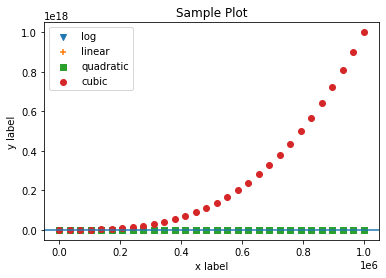

In [69]:
x = np.linspace(start=.1, stop=1000000, num=30)

size = 8


plt.axhline(y=2)

plt.scatter(x, np.log(x), label='log', marker='v', )
plt.scatter(x, x, label='linear', marker='+', )  
plt.scatter(x, x**2, label='quadratic', marker=',',)  
plt.scatter(x, x**3, label='cubic', )
plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Sample Plot")
plt.legend();

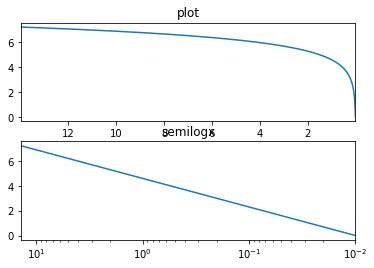

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.01,14,0.01)
y = np.log(100*x)

fig,(ax1,ax2) = plt.subplots(2)

ax1.plot(x,y)
ax1.set_xlim(x[-1],x[0])
ax1.set_title('plot')

ax2.semilogx(x,y)
ax2.set_xlim(x[-1],x[0])
ax2.set_title('semilogx')

plt.show()